In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
mart_train = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\ML\BigMartSalesPrediction\Dataset\Train.csv')
mart_test = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\ML\BigMartSalesPrediction\Dataset\Test.csv')

In [3]:
mart_train.shape

(8523, 12)

In [4]:
mart_test.shape

(5681, 11)

In [5]:
mart_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
mart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
mart_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
mart_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Our dataset contains null so we should replace null values by their mean or mode or median based on the feature type wheather it is categorical feature or numerical feature.

We replace the null values of Item_Weight by mean because it is a numerical feature.

We replace the null values of Outlet_Size by mode because it is a categorical feature.

In [9]:
mart_train['Item_Weight'].fillna(mart_train['Item_Weight'].mean(), inplace=True)
mart_train['Outlet_Size'].fillna(mart_train['Outlet_Size'].mode()[0], inplace=True)

In [10]:
mart_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Let's check for null values in test data.

In [11]:
mart_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We can apply the same imputation as we appled for train data.

In [12]:
mart_test['Item_Weight'].fillna(mart_test['Item_Weight'].mean(), inplace=True)
mart_test['Outlet_Size'].fillna(mart_test['Outlet_Size'].mode()[0], inplace=True)

In [13]:
mart_test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Check for duplicates in train and test data.

In [14]:
print(mart_test.duplicated())
print(mart_train.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Length: 5681, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool


No duplicates are there in both the training and test data.

In the given data the categorical features are 

1. Item_Identifier

2. Item_Fat_Content

3. Item_Type

4. Outlet_Identifier

5. Outlet_Size 

6. Outlet_Location_Type 

7. Outlet_Type

In [15]:
mart_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
mart_train['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

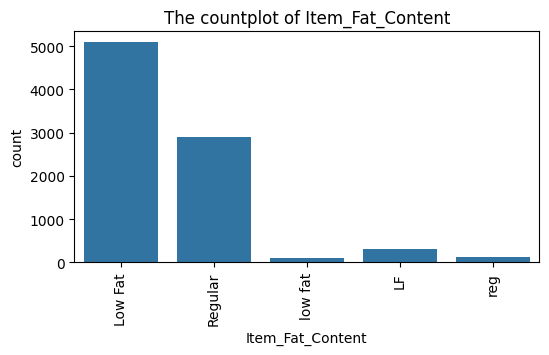

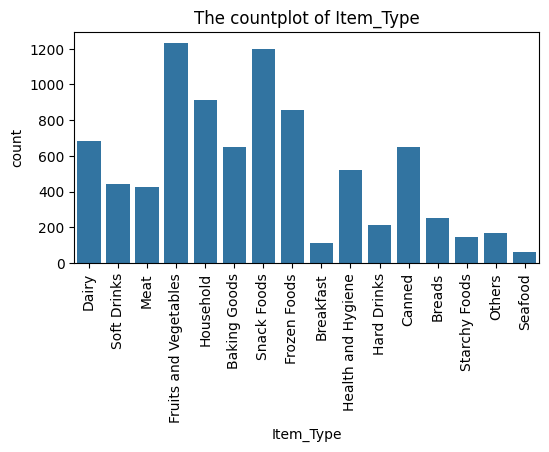

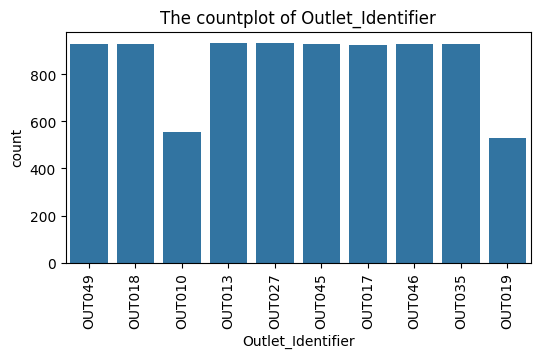

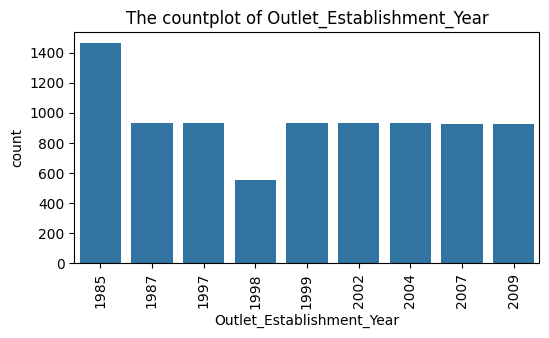

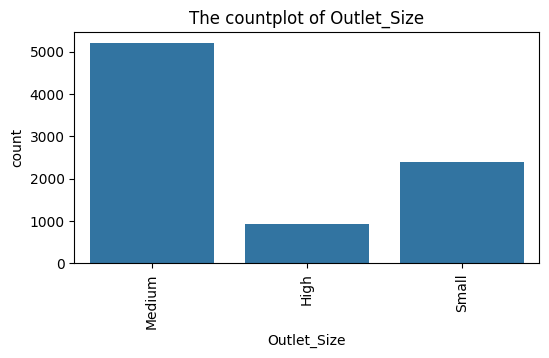

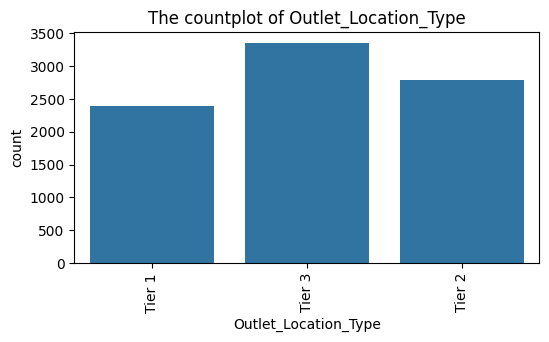

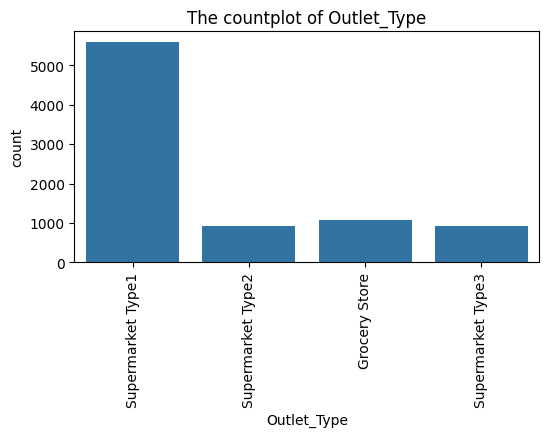

In [17]:
# List of features for which we want to create count plots
features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 
            'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Loop through each feature in the list
for i, feature in enumerate(features):
    # Create a new figure with specified size
    plt.figure(figsize=(6, 3))
    
    # Create a count plot for the current feature
    sns.countplot(x=feature, data=mart_train)
    
    # Set the title of the plot
    plt.title(f'The countplot of {feature}')
    
    # Rotate x-axis labels by 90 degrees for better readability
    plt.xticks(rotation=90)
    
    # Display the plot
    plt.show()

In [18]:
mart_train.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [19]:
mart_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

C:\Users\Hp\AppData\Local\Temp\ipykernel_6852\980655229.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_train[column])  # Create density plot


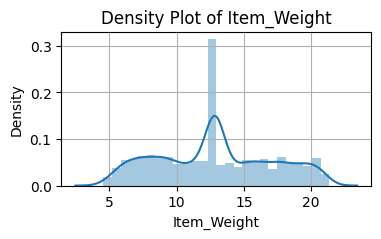

C:\Users\Hp\AppData\Local\Temp\ipykernel_6852\980655229.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_train[column])  # Create density plot


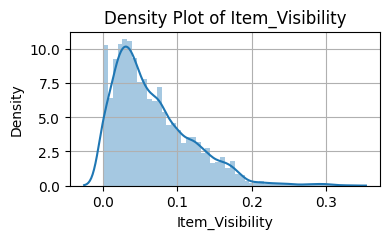

C:\Users\Hp\AppData\Local\Temp\ipykernel_6852\980655229.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_train[column])  # Create density plot


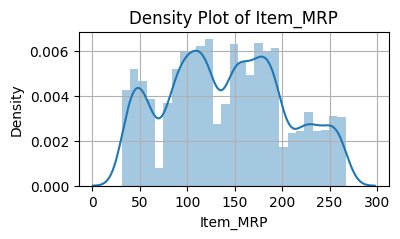

C:\Users\Hp\AppData\Local\Temp\ipykernel_6852\980655229.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_train[column])  # Create density plot


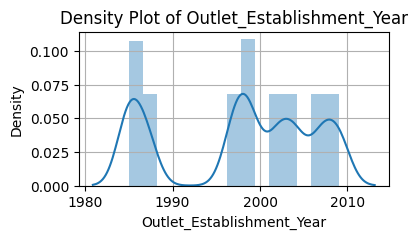

C:\Users\Hp\AppData\Local\Temp\ipykernel_6852\980655229.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_train[column])  # Create density plot


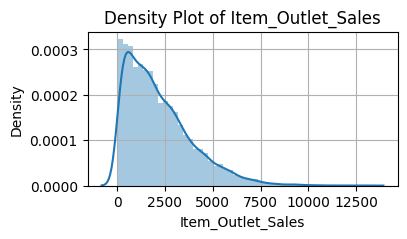

In [20]:
numeric_columns = mart_train.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numeric column and create density plots
for column in numeric_columns:
    plt.figure(figsize=(4, 2))  # Set the figure size
    sns.distplot(mart_train[column])  # Create density plot
    plt.title(f'Density Plot of {column}')  # Set the title
    plt.xlabel(column)  # Set the x-axis label
    plt.ylabel('Density')  # Set the y-axis label
    plt.grid(True)  # Show grid
    plt.show()  # Display the density plot

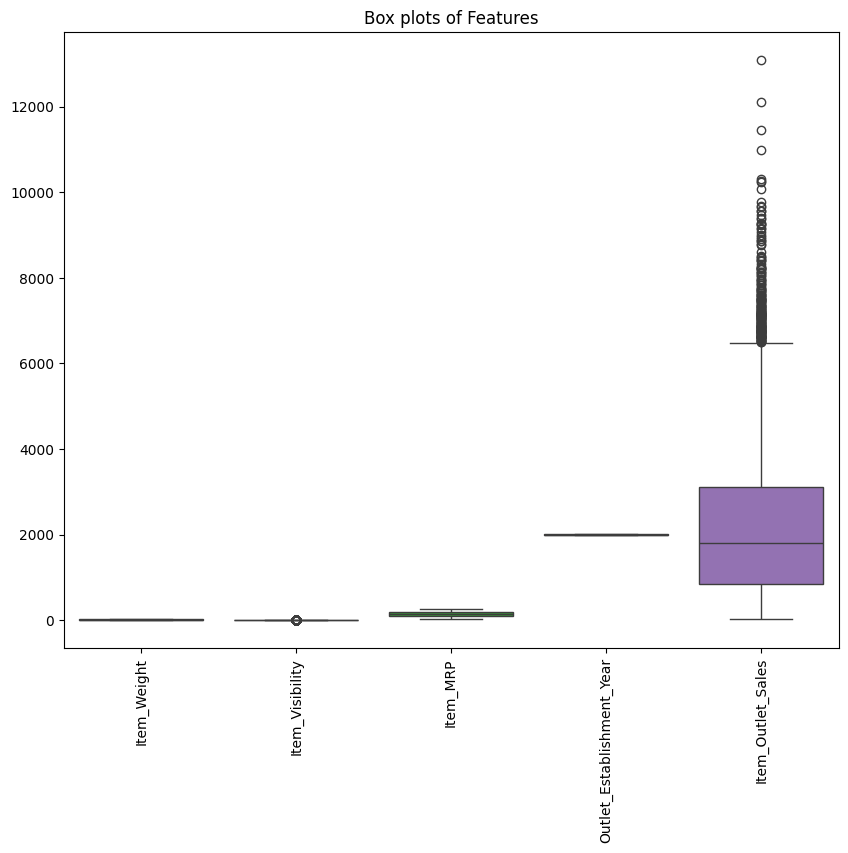

In [21]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=mart_train)
plt.title('Box plots of Features')
plt.xticks(rotation=90)
plt.show()

We can conclude that our data has outlier for item_visibility

In [22]:
from scipy.stats.mstats import winsorize
mart_train['Item_Visisbility_winsorized'] = winsorize(mart_train['Item_Visibility'], limits=[0.05, 0.05])
mart_train.drop(['Item_Visibility'], axis=1, inplace=True)

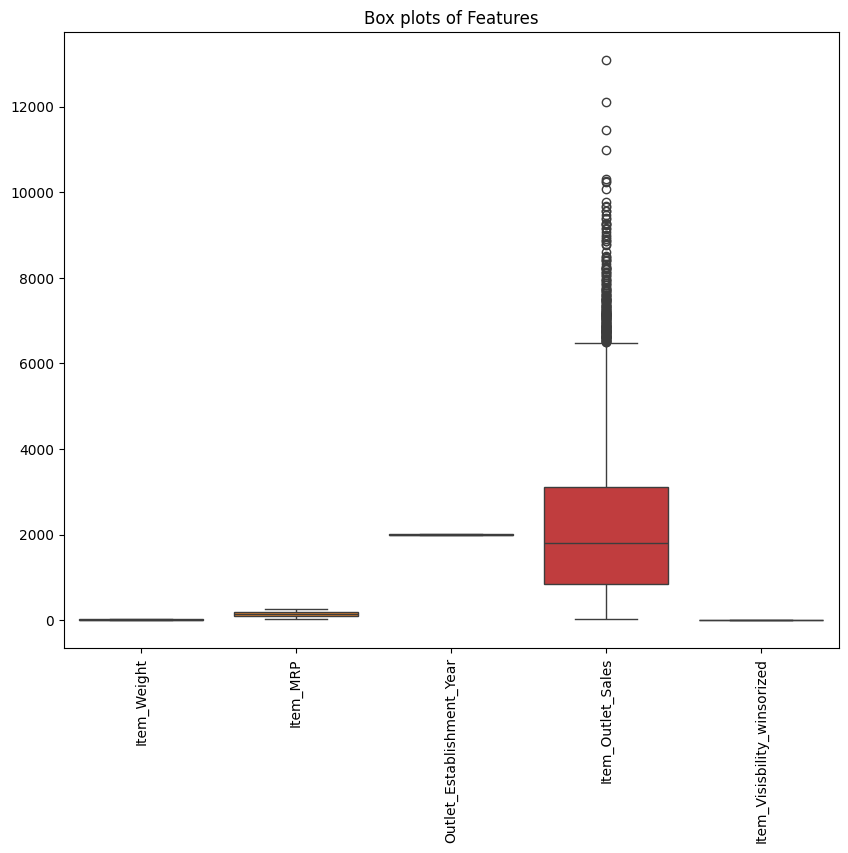

In [23]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=mart_train)
plt.title('Box plots of Features')
plt.xticks(rotation=90)
plt.show()

Lets encode the categorical features into numerical features using label encoder

In [24]:
encoder = LabelEncoder()
fearures = mart_train.select_dtypes(['object']).columns
for feature in features:
    mart_train[feature] = encoder.fit_transform(mart_train[feature])

In [25]:
mart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Item_Identifier              8523 non-null   object 
 1   Item_Weight                  8523 non-null   float64
 2   Item_Fat_Content             8523 non-null   int32  
 3   Item_Type                    8523 non-null   int32  
 4   Item_MRP                     8523 non-null   float64
 5   Outlet_Identifier            8523 non-null   int32  
 6   Outlet_Establishment_Year    8523 non-null   int64  
 7   Outlet_Size                  8523 non-null   int32  
 8   Outlet_Location_Type         8523 non-null   int32  
 9   Outlet_Type                  8523 non-null   int32  
 10  Item_Outlet_Sales            8523 non-null   float64
 11  Item_Visisbility_winsorized  8523 non-null   float64
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 599.4+ KB


In [26]:
mart_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visisbility_winsorized
0,FDA15,9.30,0,4,249.8092,9,4,1,0,1,3735.1380,0.016047
1,DRC01,5.92,1,14,48.2692,3,8,1,2,2,443.4228,0.019278
2,FDN15,17.50,0,10,141.6180,9,4,1,0,1,2097.2700,0.016760
3,FDX07,19.20,1,6,182.0950,0,3,1,2,0,732.3800,0.000000
4,NCD19,8.93,0,9,53.8614,1,1,0,2,1,994.7052,0.000000


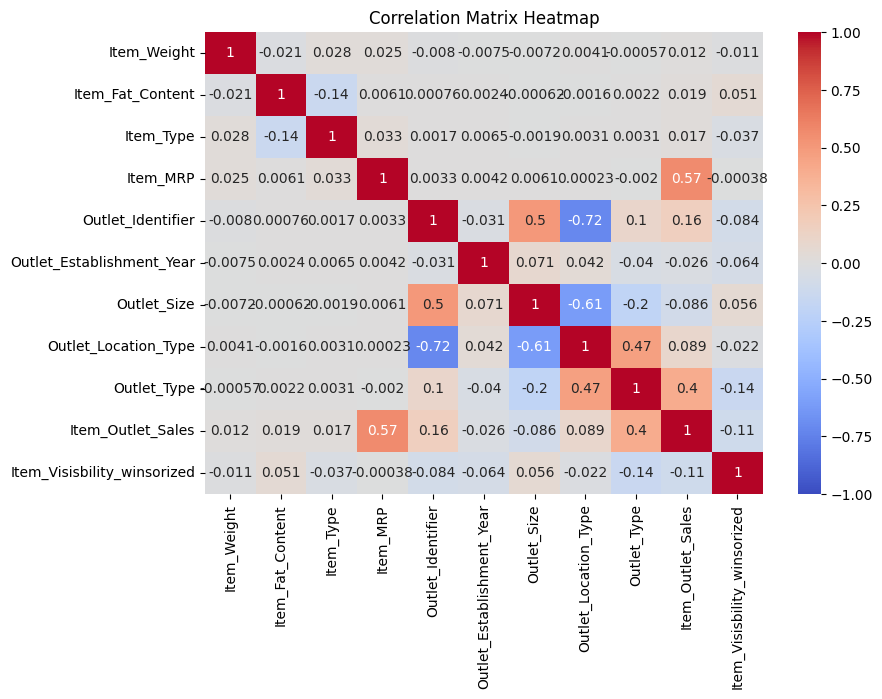

In [27]:
# Select numerical columns
numerical_columns = mart_train.select_dtypes(include=['int32', 'float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [28]:
correlation_matrix['Item_Outlet_Sales']

Item_Weight                    0.011550
Item_Fat_Content               0.018719
Item_Type                      0.017048
Item_MRP                       0.567574
Outlet_Identifier              0.162325
Outlet_Establishment_Year     -0.025525
Outlet_Size                   -0.086182
Outlet_Location_Type           0.089367
Outlet_Type                    0.401522
Item_Outlet_Sales              1.000000
Item_Visisbility_winsorized   -0.107881
Name: Item_Outlet_Sales, dtype: float64

In [29]:
mart_train['MRP_MRP'] = mart_train['Item_MRP']*mart_train['Item_MRP']
mart_train['MRP_Outlet_Type'] = mart_train['Item_MRP']*mart_train['Outlet_Type']

In [30]:
X = mart_train.drop(['Item_Outlet_Sales','Item_Identifier'], axis=1)
y=mart_train['Item_Outlet_Sales']

model = RandomForestRegressor()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature importances:\n", feature_importances)

Feature importances:
 Item_Weight                    0.055853
Item_Fat_Content               0.009178
Item_Type                      0.045687
Item_MRP                       0.079236
Outlet_Identifier              0.015511
Outlet_Establishment_Year      0.026757
Outlet_Size                    0.008140
Outlet_Location_Type           0.004913
Outlet_Type                    0.002436
Item_Visisbility_winsorized    0.106398
MRP_MRP                        0.083760
MRP_Outlet_Type                0.562130
dtype: float64


Key Insights and Actions:
High Importance of MRP and Its Interactions: The high importance of MRP, MRP_MRP, and especially MRP_Outlet_Type suggests that price and its interactions with outlet type are crucial. Focus on these features to improve model performance.

Moderate Importance of Item Features: Features like Item_Weight, Item_Type, and Item_Visibility_winsorized have moderate importance. Consider these features as significant but secondary to MRP-related features.

Low Importance of Outlet Characteristics: Features related to outlet identifiers, size, location type, and type have low importance, indicating these might have less impact on predictions. However, their interactions with other features, such as MRP, can still be significant.

Feature Engineering: Given the high importance of interaction features, consider creating more interaction terms and polynomial features to capture complex relationships.

Model Simplification: Features with very low importance (e.g., Outlet_Type, Outlet_Location_Type, Outlet_Size) could potentially be removed to simplify the model without significantly impacting performance.

In [31]:
X.drop(['Outlet_Type','Outlet_Location_Type', 'Outlet_Size'], axis=1, inplace=True)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [33]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(7670, 9) (853, 9) (7670,) (853,)


In [34]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Initialize and fit the RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, bootstrap=True)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 754.2896437327081
Mean Squared Error (MSE): 1168357.667655382
Root Mean Squared Error (RMSE): 1080.905947645484
R^2 Score: 0.5821106572786107
